In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/yolov9-main

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1FsxtjdRhKCSS4b319zT5rcL3Dd5sOLs5/yolov9-main


In [ ]:
!pip install git+https://github.com/cocodataset/panopticapi.git

In [ ]:
!git clone https://github.com/bowenc0221/panoptic-deeplab.git
!cd panoptic-deeplab
!pip install -r requirements.txt
!cd ..

In [ ]:
!pip install fvcore

In [ ]:
import os

def replace_np_float(repo_path):
    for root, _, files in os.walk(repo_path):
        for file in files:
            if file.endswith('.py'):
                filepath = os.path.join(root, file)
                with open(filepath, 'r', encoding='utf-8') as f:
                    content = f.read()

                new_content = content.replace('float6464', 'float64')
                # Optional: uncomment below to replace np.int as well
                # new_content = new_content.replace('np.int', 'int')

                if new_content != content:
                    with open(filepath, 'w', encoding='utf-8') as f:
                        f.write(new_content)
                    print(f'Fixed np.float in {filepath}')

if __name__ == '__main__':
    repo_root = '/content/gdrive/MyDrive/yolov9-main/panoptic-deeplab'  # change if needed
    replace_np_float(repo_root)
    print("All done!")

All done!


In [5]:
import sys
import os
import yaml
import numpy as np
import torch

sys.path.insert(0, '/content/gdrive/MyDrive/yolov9-main/panoptic-deeplab')

In [6]:
!mkdir -p /root/.cache/torch/hub/checkpoints/
!cp /content/gdrive/MyDrive/yolov9-main/output/hrnetv2_w48_imagenet_pretrained.pth \
   /root/.cache/torch/hub/checkpoints/hrnetv2_w48_imagenet_pretrained.pth

In [12]:
import os
import glob
import matplotlib.pyplot as plt
import cv2

def show_predictions_grid(semantic_dir, instance_dir, panoptic_dir, max_images=5):
    # --- collect image paths ---
    semantic_imgs = sorted(glob.glob(os.path.join(semantic_dir, "semantic_pred_*.png")))
    instance_imgs = sorted(glob.glob(os.path.join(instance_dir, "panoptic_to_instance_pred_*.png")))
    panoptic_imgs = sorted(glob.glob(os.path.join(panoptic_dir, "panoptic_pred_*.png")))

    # take minimum available count
    n = min(len(semantic_imgs), len(instance_imgs), len(panoptic_imgs), max_images)

    # --- prepare grid ---
    fig, axs = plt.subplots(n, 3, figsize=(15, 15))

    if n == 1:
        axs = [axs]  # make iterable if single row

    for i in range(n):
        sem = cv2.imread(semantic_imgs[i])[:, :, ::-1]   # BGR->RGB
        ins = cv2.imread(instance_imgs[i])[:, :, ::-1]
        pan = cv2.imread(panoptic_imgs[i])[:, :, ::-1]

        axs[i][0].imshow(sem)
        axs[i][1].imshow(ins)
        axs[i][2].imshow(pan)

        for ax in axs[i]:
            ax.axis("off")

    # set titles only on top row
    axs[0][0].set_title("Semantic", fontsize=14)
    axs[0][1].set_title("Instance", fontsize=14)
    axs[0][2].set_title("Panoptic", fontsize=14)

    plt.tight_layout()
    plt.show()

In [ ]:
!python panoptic-deeplab/tools/demo.py \
  --cfg panoptic-deeplab/configs/panoptic_deeplab_H48_os4_cityscapes.yaml \
  --input-files /content/gdrive/MyDrive/Pytorch-Models/datasets/camvid_data/test/Seq05VD_f02790.png \
  --output-dir /content/gdrive/MyDrive/yolov9-main/output/h48results3/ \
  TEST.MODEL_FILE /content/gdrive/MyDrive/yolov9-main/output/panoptic_deeplab_H48_os4_cityscapes.pth

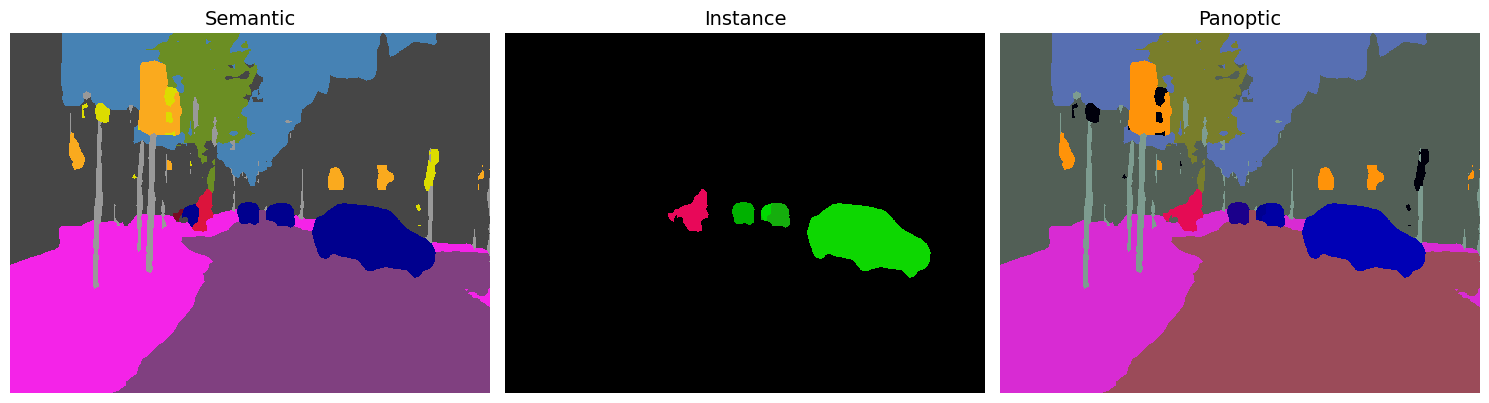

In [14]:
show_predictions_grid(
    "/content/gdrive/MyDrive/yolov9-main/output/h48results3/semantic",
    "/content/gdrive/MyDrive/yolov9-main/output/h48results3/instance",
    "/content/gdrive/MyDrive/yolov9-main/output/h48results3/panoptic",
    max_images=1
)

In [7]:
!python panoptic-deeplab/tools/demo.py \
  --cfg panoptic-deeplab/configs/panoptic_deeplab_H48_os4_cityscapes.yaml \
  --input-files /content/gdrive/MyDrive/Pytorch-Models/datasets/cityscapes-tests/ \
  --output-dir /content/gdrive/MyDrive/yolov9-main/output/h48results4/ \
  TEST.MODEL_FILE /content/gdrive/MyDrive/yolov9-main/output/panoptic_deeplab_H48_os4_cityscapes.pth

[08/24 07:48:59 demo]: Namespace(cfg='panoptic-deeplab/configs/panoptic_deeplab_H48_os4_cityscapes.yaml', input_files='/content/gdrive/MyDrive/Pytorch-Models/datasets/cityscapes-tests/', output_dir='/content/gdrive/MyDrive/yolov9-main/output/h48results4/', extension='.png', merge_image=False, opts=['TEST.MODEL_FILE', '/content/gdrive/MyDrive/yolov9-main/output/panoptic_deeplab_H48_os4_cityscapes.pth'])
[08/24 07:48:59 demo]: CKPT_FREQ: 5000
CUDNN:
  BENCHMARK: True
  DETERMINISTIC: False
  ENABLED: True
DATALOADER:
  NUM_WORKERS: 4
  SAMPLER_TRAIN: TrainingSampler
  TRAIN_SHUFFLE: True
DATASET:
  CROP_SIZE: (1025, 2049)
  DATASET: cityscapes_panoptic
  IGNORE_STUFF_IN_OFFSET: True
  MAX_RESIZE_VALUE: -1
  MAX_SCALE: 2.0
  MEAN: (0.485, 0.456, 0.406)
  MIN_RESIZE_VALUE: -1
  MIN_SCALE: 0.5
  MIRROR: True
  NUM_CLASSES: 19
  RESIZE_FACTOR: -1
  ROOT: ./datasets/cityscapes
  SCALE_STEP_SIZE: 0.1
  SEMANTIC_ONLY: False
  SMALL_INSTANCE_AREA: 4096
  SMALL_INSTANCE_WEIGHT: 3
  STD: (0.229, 0

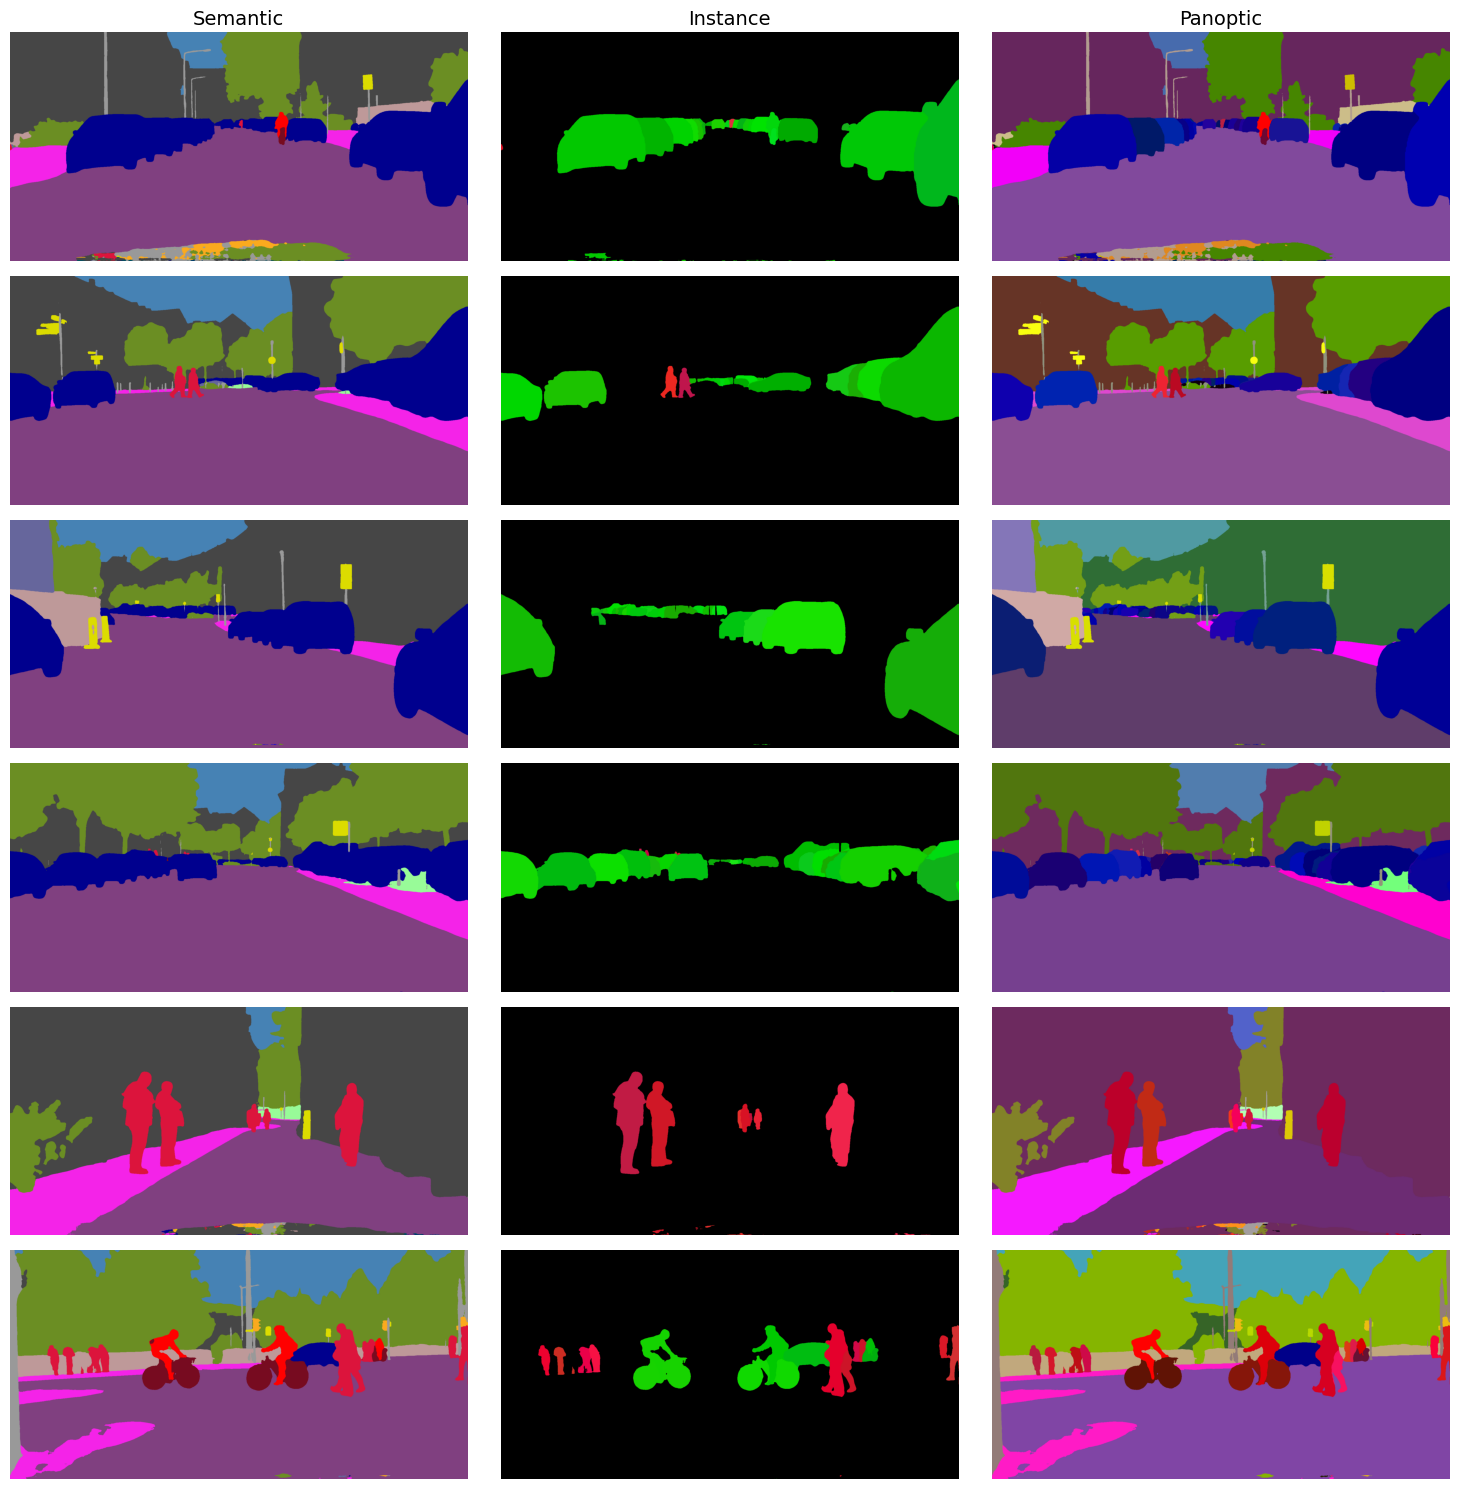

In [13]:
show_predictions_grid(
    "/content/gdrive/MyDrive/yolov9-main/output/h48results4/semantic",
    "/content/gdrive/MyDrive/yolov9-main/output/h48results4/instance",
    "/content/gdrive/MyDrive/yolov9-main/output/h48results4/panoptic",
    max_images=6
)